# Import software libraries and load the dataset

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data frames.
import sklearn                         # Perform feature engineering and machine learning.
from sklearn import datasets
import matplotlib                      # Create charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Streamline charting.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- Python {}\n'.format(sys.version))

# Load the dataset.
cancer = datasets.load_breast_cancer()
print('Loaded {} records.'.format(len(cancer.data)))

Libraries used in this project:
- NumPy 2.1.3
- pandas 2.2.3
- scikit-learn 1.6.1
- Matplotlib 3.10.3
- Seaborn 0.13.2
- Python 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]

Loaded 569 records.


# Get acquainted with the dataset

In [2]:
# Convert array to pandas data frame.
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df['target'] = cancer['target']
# View data types and see if there are missing entries.
print(df.info())
# View first 10 records.
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Examine descriptive statistics

In [3]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
with pd.option_context('float_format', '{:.2f}'.format): 
    display(df.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


# Examine the distributions of various features

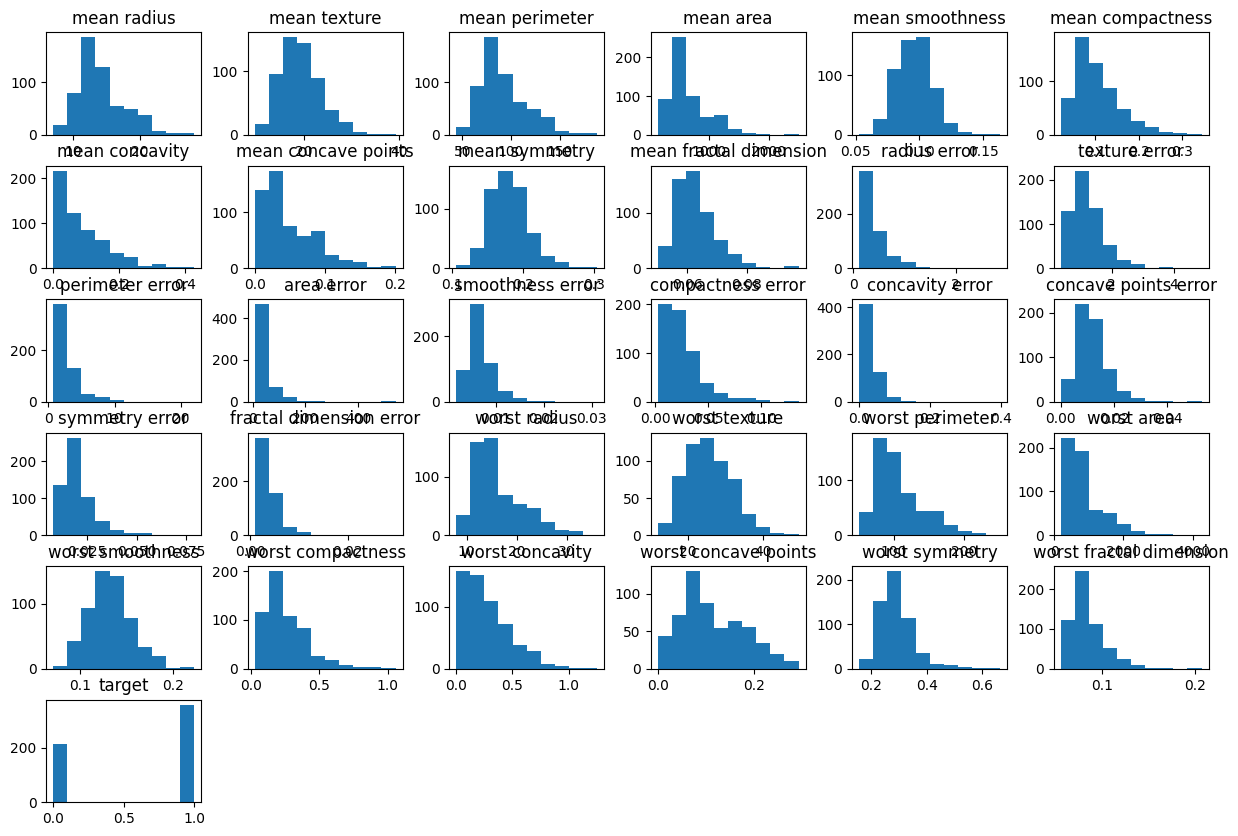

In [4]:
# Plot distribution histograms for all features.
df.hist(figsize = (15, 10), grid = False);

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df.drop(['target'], axis = 1))

# Split the data into training and validation sets and labels

In [17]:
from sklearn.model_selection import train_test_split
# Split the training and testing datasets and their labels.
label_cols = ['target']
training_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                 'mean smoothness', 'mean compactness', 'mean concavity',
                 'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error',
                 'fractal dimension error','worst radius',
                 'worst texture', 'worst perimeter', 'worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']

X, y = df[training_cols], df[label_cols]

#X_train, X_test, y_train, y_test = train_test_split(
#   X, y, test_size=0.2, random_state=42
#)

X_train, X_test, y_train, y_test = train_test_split(
    df_x_scaled, df['target'],random_state=100
)

# Compare number of rows and columns in original data to training and testing sets.
print(f'Original dataset:   {df.shape}')
print('------------------------------')
print(f'Training features:  {X_train.shape}')
print(f'Training labels:    {y_train.shape}')
print(f'Testing features:   {X_test.shape}')
print(f'Testing labels:     {y_test.shape}')


Original dataset:   (569, 31)
------------------------------
Training features:  (426, 30)
Training labels:    (426,)
Testing features:   (143, 30)
Testing labels:     (143,)


# Create a logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
from time import time   
# Construct a basic logistic regression class object.
log_reg = LogisticRegression(solver = 'sag', C = 0.05, max_iter = 10)
start = time()
log_reg.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000
score = log_reg.score(X_test, y_test)
print('Logistic regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Score on test set: {:.0f}%'.format(score * 100))
# Fit the training data to the logistic regression object.

Logistic regression model took 6.31 milliseconds to fit.
Score on test set: 97%


C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Compare the first 10 predictions to actual values

In [19]:
# Make predictions on the test set.
preds = log_reg.predict(X_test)
results = pd.DataFrame(y_test.iloc[:10])
results.insert(1, 'Target_pred', preds[:10].round(2))
results

# View first 10 examples of the predictions compared to actual breast cancer classification.


,target,Target_pred
400,0,0
225,1,1
321,0,0
173,1,1
506,1,1
380,1,1
197,0,0
260,0,0
40,0,1
160,1,1


# Evaluate the performance of the model on the test set

In [20]:
# Obtain the accuracy, precision, recall, and F1 score of the predictions compared to the test labels.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_scores(y, preds):
    '''Generates various classification metrics based on model predictions.'''
    acc = accuracy_score(y, preds)
    print('Accuracy: {:.2f}%'.format(np.round(acc * 100)))
    
    precision = precision_score(y, preds)
    print('Precision: {:.2f}%'.format(np.round(precision * 100)))
    
    recall = recall_score(y, preds)
    print('Recall: {:.2f}%'.format(np.round(recall * 100)))
    
    f1 = f1_score(y, preds)
    print('F1: {:.2f}%'.format(np.round(f1 * 100)))
    
print('The function to compute scores has been defined.')

The function to compute scores has been defined.


# Optimize the logistic regression model using grid search and cross-validation

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score
# Use the following hyperparameter grid in the search.
grid = [{'solver': ['liblinear'],
         'penalty': ['l1', 'l2'],
         'C': [0.001, 0.01, 0.1, 1, 5, 10],
         'max_iter': [10000]},
        {'solver': ['sag'],
         'penalty': ['l2'],
         'C': [0.001, 0.01, 0.1, 1, 5, 10],
         'max_iter': [10000]}]

log_reg = LogisticRegression()
recall_scorer = make_scorer(recall_score)
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, scoring=recall_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)
print(f"Best cross-validated recall: {grid_search.best_score_:.4f}")
# Search for the hyperparameter combination that results in the highest recall.


# Print the best hyperparameters.

{'C': 0.001, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}
Best cross-validated recall: 1.0000


In [22]:
model_scores(y_test, preds)

Accuracy: 97.00%
Precision: 95.00%
Recall: 100.00%
F1: 97.00%


# Determine if the grid search model improved the scores on the test set

In [23]:
# Use the best grid search model to make predictions on the test set.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
model_scores(y_test,y_pred_best)

# Get the scores on the same four metrics, but using the grid search model's predictions.

Accuracy: 91.00%
Precision: 88.00%
Recall: 99.00%
F1: 93.00%


In [ ]:
11. Feature importance

In [ ]:
y = a1x1 + a2x2 + a3x3 +... a30x30 + b

In [28]:
coefs = log_reg.coef_[0]
coefs

array([-0.3034297 , -0.35084697, -0.29851303, -0.29458979, -0.193171  ,
       -0.0723929 , -0.28784774, -0.36801117, -0.10374304,  0.16972926,
       -0.33937469, -0.05415761, -0.27129436, -0.2812973 , -0.06310529,
        0.1724515 ,  0.03175809, -0.11683046,  0.08044764,  0.20549097,
       -0.37938847, -0.4336655 , -0.36275323, -0.34677383, -0.35256497,
       -0.13782137, -0.29065696, -0.40857603, -0.234586  , -0.09344615])

In [32]:
coef_df = pd.DataFrame({"feature":X_train.columns,"coefficient":coefs})
coef_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
coef_df['ab']

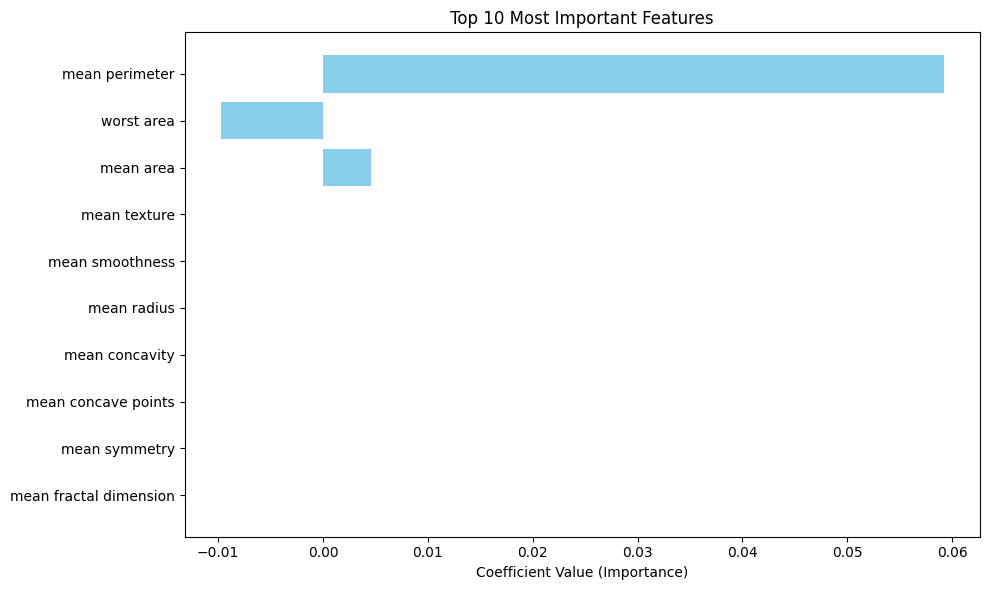

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the best trained model
best_model = grid_search.best_estimator_

# Get feature names (same order as training data)
feature_names = X_train.columns

# Get coefficients (it's a 2D array with shape [1, n_features], so flatten it)
coefficients = best_model.coef_.flatten()

# Create a DataFrame for easy sorting and plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute value of coefficients (importance)
top_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at top
plt.title('Top 10 Most Important Features')
plt.xlabel('Coefficient Value (Importance)')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20,random_state=42)
rf_model.fit(x_train,y_train)


NameError: name 'x_train' is not defined

In [ ]:
rf_preds = rf_model.predict(X_test)
rf_preds

In [4]:
model_score(y_test,rf_preds)

NameError: name 'model_score' is not defined

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,rf_preds)

In [13]:
array([[53,3],[2,85]],dtype=int64)

NameError: name 'array' is not defined

In [ ]:
feature_names = X_train.columns

In [8]:
importances = rf_model.feature_importances_
importances

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [12]:
rf_df = pd.DataFrame({"feaures":feature_names,"importances":importances})
rf_df = rf_df.sort_values(by='imporrtances',ascending=False).head(10)

NameError: name 'pd' is not defined

In [ ]:
rf_df